In [145]:
import sys
if not sys.argv[1] == "-f":
    analy_dir = sys.argv[1]
    mode = "command_line"
else:
    # 手動で解析する場合はデータのあるpathを指定してください
    analy_dir = "./"
    mode = "notebook"

In [146]:
import n2df
import numpy
import matplotlib.pyplot as plt
import pandas
import os

In [147]:
n = n2df.Read(os.path.join(analy_dir , "skydip.ndf"))
if os.path.exists(os.path.join(analy_dir , "weather.csv")):
    w = pandas.read_csv(os.path.join(analy_dir, "weather.csv"))
    temp = numpy.mean(w["cabin_temp1"])
    temp = temp + 273
else:
    print("[Warning] : weather.csv does not exist")
    print("[Warning] : use 300K as cabin temperature temporarily")
    temp = 300

[Warning] : weather.csv does not exist
[Warning] : use 300K as cabin temperature temporarily


In [148]:
obs_mode = n.read_obs_mode()
data_list = []
for i in range(16):
    exec("data_list.append(n.read_onearray({}))".format(i))
El = n.read_scan_num()

100%|██████████| 128/128 [00:00<00:00, 179435.47it/s]


In [149]:
obs_mode = numpy.array(obs_mode)
El_list = numpy.array(El)

In [150]:
hotmask = obs_mode == "HOT"
skymask = obs_mode == "SKY"
El = numpy.unique(El_list[skymask])

In [151]:
data_list = numpy.array(data_list)
hot_list = []
for j in range(16):
    hot_list.append(numpy.mean(data_list[j][hotmask]))
print(El)
sky_list = []
for j in range(16):
    tmp = []
    for el in El:
        mask = El_list == el
        tmp.append(numpy.mean(data_list[j][mask]))
    sky_list.append(tmp)

[ 0 20 25 30 45 60 70 80]


In [152]:
d_ = []
for j in range(16):
    tmp = []
    for i in range(len(El)):
        d_temp = hot_list[j] - sky_list[j][i]
        d_temp2 = numpy.log10(d_temp)
        tmp.append(d_temp2)
    d_.append(tmp)
    
# seczの計算
secz = []
for i in range(len(El)):
    secz_temp = (El[i]/180)*numpy.pi
    secz.append(1/numpy.cos(secz_temp))

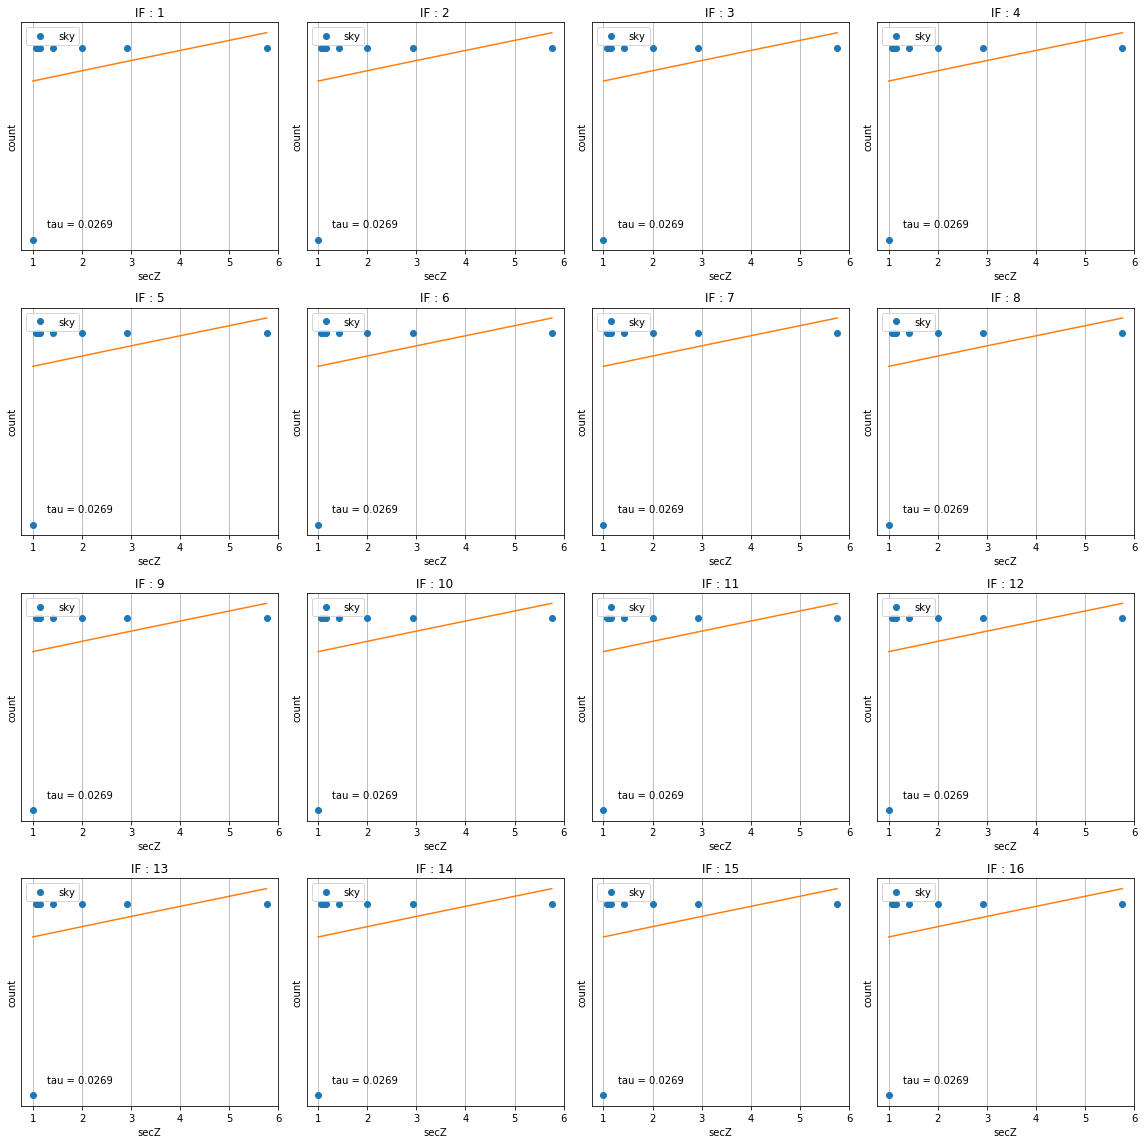

In [154]:
fig = plt.figure(figsize=(16,16))
ax = [fig.add_subplot(4, 4, i+1) for i in range(16)]
    
for i, _ax in enumerate(ax):
    f = numpy.polyfit(secz, d_[i], 1)
    _ax.plot(secz, d_[i], "o", label="sky")
    _ax.plot(secz, numpy.poly1d(f)(secz))
    _ax.set_xlabel('secZ')
    _ax.set_ylabel("count")
    _ax.set_yscale("log")
    _ax.set_title('IF : {}'.format(i+1))
    _ax.text(0.1, 0.1, 'tau = {:.4f}'.format(f[0]), transform = _ax.transAxes)
    _ax.legend()
    _ax.grid()
    
plt.tight_layout()
plt.savefig(os.path.join(analy_dir, "result.png"))
if mode == "notebook":
    plt.show()